# Corrections: Homework Assignment 1 - Evan Callaghan

## 1. What type of algorithm would you use to segment a company customers database into multiple groups? Explain
### Correct
#### If you don’t know how to define the groups, then you can use a clustering algorithm (unsupervised learning), such as k-means, to segment your customers into clusters of similar customers. However, if you know what groups you would like to have, then you can feed many examples of each group to a classification algorithm (supervised learning), and it will classify all the customers into these groups.

## 2. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem? Explain.
### Correct
#### Spam detection is a typical supervised learning problem: the algorithm is fed many emails along with their labels (spam or not spam).

## 3.  What is a test set, and why would you want to use it?
### Correct
#### The test set is used to estimate the error that a model will make on new observations, before the model in launched in a production environment.

## 4. You are training a classification model with 100 variables/features that achieves 95% accuracy in the training dataset. However, when you run it in the test dataset, you only get 60% accuracy. Which of the following options are valid approached to solve this problem?
### Correct
#### E. Reduce the number of input variables/features and implement cross-validation during the training process.
#### This is clearly an overfitting issue. In order to solve this type of problem, you could reduce the excessive number of features (which will reduce the complexity of the model and make it less dependent on the training set). Additionally, you could also implement cross-validation during the training process.

In [1]:
import boto3
import pandas as pd

## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'data-445-bucket-callaghan'
bucket = s3.Bucket(bucket_name)

## Defining the csv file
file_key = 'Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')


## 5. a) Using the pandas library to read the csv data file and create a data-frame

house_price = pd.read_csv(file_content_stream)

house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
## b) Dropping the No and transaction_date columns

house_price = house_price.drop(columns = ['No', 'transaction_date'], axis = 1)

house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
## c) Splitting the data-frame into two data-frames: train (80%) and test (20%)

## Input: house age, distance to the nearest MRT station, number of convenience stores, latitude, and longitude
## Target: house price of unit area

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

## Defining the input and target variables
X = house_price[['house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']]
Y = house_price['house_price_of_unit_area']

## Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [4]:
## d) Using the train data-frame to build a linear regression model

## Building the model
lm_md = LinearRegression().fit(X_train, Y_train)

# Predicting the house price of unit area of the houses in the test data-frame
preds = lm_md.predict(X_test)

## Computing the MSE
MSE = np.mean(np.power(preds - Y_test, 2))

print('MSE:', MSE)

## The MSE of the first linear regression model is about 62.6

MSE: 62.64412947534932


In [5]:
## e) Using the train data-frame to build a linear regression model

## Input: house age, number of convenience stores, latitude, and longitude
## Target: house price of unit area

X_train_new = X_train.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)
X_test_new = X_test.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)

## Building the model
lm_md = LinearRegression().fit(X_train_new, Y_train)

# Predicting the house price of unit area of the houses in the test data-frame
preds = lm_md.predict(X_test_new)

## Computing the MSE
MSE = np.mean(np.power(preds - Y_test, 2))

print('MSE:', MSE)

## The MSE of the second linear regression model is about 75.9

MSE: 75.92722602107501


In [ ]:
## f) In model selection, a lower mean square error value indicates that the model is a better fit. Therefore, using the results from parts (d) and (e), 
## we would select the first linear regression model because it has a lower MSE.

MSE Model 1: 79.65282562689978


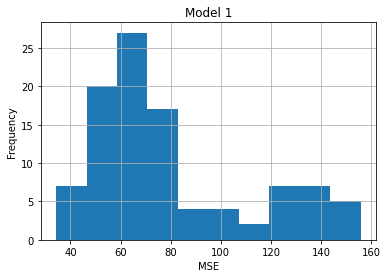

MSE Model 2: 86.3525221233368


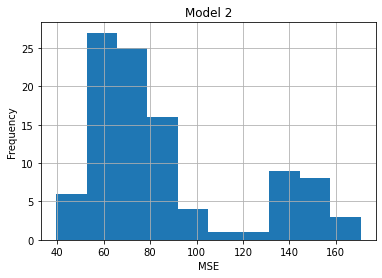

In [9]:
## g) Repeating steps (c) to (e) 100 times, and visualizing the MSE of each of the models at each iteration

import matplotlib.pyplot as plt

md1_results = []
md2_results = []

for i in range(0, 100):
    
    ## Splitting the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
    ## Defining data for the second model
    X_train_new = X_train.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)
    X_test_new = X_test.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)
    
    ## Model 1
    md1 = LinearRegression().fit(X_train, Y_train)
    pred1 = md1.predict(X_test)
    mse1 = np.mean(np.power(pred1 - Y_test, 2))
    md1_results.append(mse1)

    ## Model 2
    md2 = LinearRegression().fit(X_train_new, Y_train)
    pred2 = md2.predict(X_test_new)
    mse2 = np.mean(np.power(pred2 - Y_test, 2))
    md2_results.append(mse2)



print('MSE Model 1:', np.mean(md1_results))

plt.hist(md1_results)
plt.title('Model 1')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.grid()
plt.show()


print('MSE Model 2:', np.mean(md2_results))

plt.hist(md2_results)
plt.title('Model 2')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.grid()
plt.show()


## Over 100 iterations, we can see that the MSE of Model 1 (79.6) is lower than that of Model 2 (86.4). Therefore, Model 1 has the better 
## performance on the test data sets (lower error is always preferred).